In [1]:
__author__='Xia Wang'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os

## Task 1

In [2]:
data = np.load(os.getenv('PUI2015')+'/HW6/MTA_Fare.npy')

In [3]:
print data.shape
'''
ridetype np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])
'''    

(600, 23, 194)


"\nridetype np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',\n            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',\n            'umlim','xbus','stud'])\n"

In [4]:
data = np.where(data != -1, data, np.nan)

In [53]:
# add up all the stations
by_ridetype_sum = np.nansum(data, axis=0)/23
# add up all ride types
by_station_sum = np.nansum(data, axis=1)/600

In [54]:
station1 = pd.DataFrame(by_station_sum.T)
station1.index = pd.date_range('5/21/2010',periods=194,freq='W-FRI')

<function matplotlib.pyplot.show>

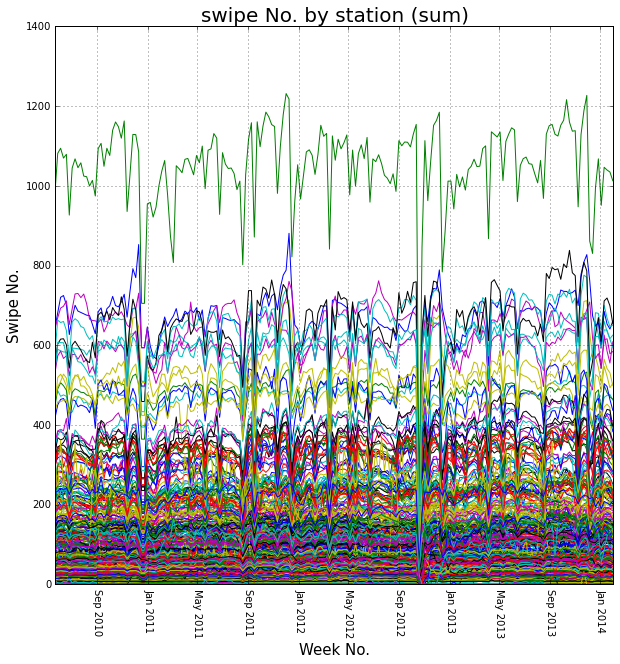

In [66]:
fig1 = plt.figure(figsize=(10,10))
fig1.add_subplot(111)
plt.plot(station1.index, station1)
plt.title('swipe No. by station (sum)',fontsize=20)
plt.xticks(rotation=270)
plt.xlabel('Week No.', fontsize=15)
plt.ylabel('Swipe No.', fontsize=15)
plt.grid()
plt.show

In [57]:
ridetype1 = pd.DataFrame(by_ridetype_sum.T)
ridetype1.columns = ['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
                    'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t','umlim',
                    'xbus','stud']
ridetype1.index = pd.date_range('5/21/2010',periods=194,freq='W-FRI')

<function matplotlib.pyplot.show>

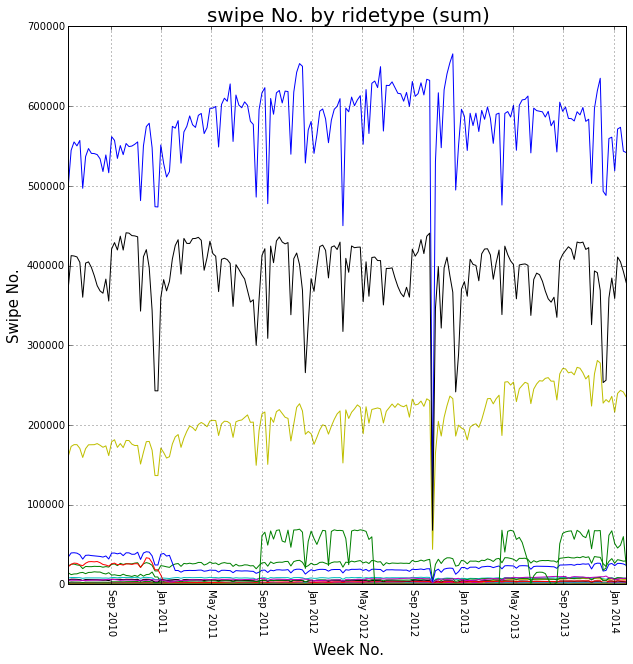

In [67]:
fig1 = plt.figure(figsize=(10,10))
fig1.add_subplot(111)
plt.plot(ridetype1.index, ridetype1)
plt.title('swipe No. by ridetype (sum)',fontsize=20)
plt.xticks(rotation=270)
plt.xlabel('Week No.', fontsize=15)
plt.ylabel('Swipe No.', fontsize=15)
plt.grid()
plt.show

In [58]:
by_ridetype_avg = np.nanmean(data, axis=0)/23
by_station_avg = np.nanmean(data, axis=1)/600

In [44]:
# print by_ridetype_avg.shape
# print by_station_avg.shape

In [59]:
ridetype = pd.DataFrame(by_ridetype_avg.T)

In [60]:
ridetype.columns = ['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
                    'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t','umlim',
                    'xbus','stud']

In [61]:
ridetype.index = pd.date_range('5/21/2010',periods=194,freq='W-FRI')

In [62]:
station = pd.DataFrame(by_station_avg.T)

In [63]:
station.index = pd.date_range('5/21/2010',periods=194,freq='W-FRI')

<function matplotlib.pyplot.show>

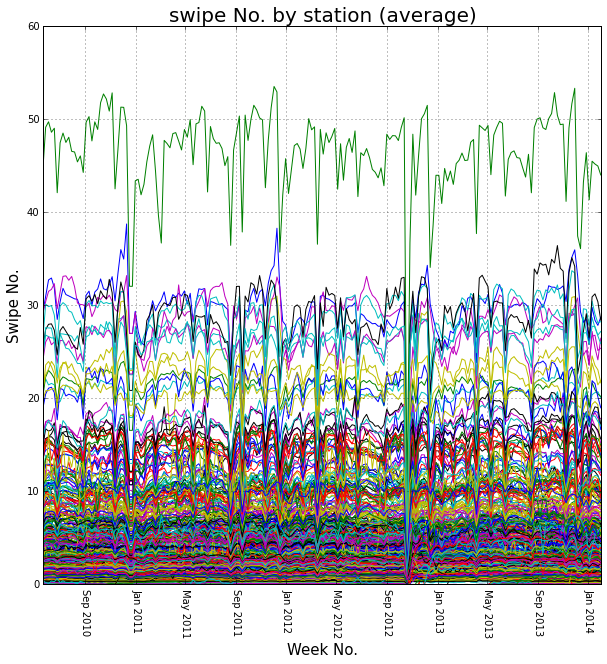

In [69]:
fig1 = plt.figure(figsize=(10,10))
fig1.add_subplot(111)
plt.plot(station.index, station)
plt.title('swipe No. by station (average)',fontsize=20)
plt.xticks(rotation=270)
plt.xlabel('Week No.', fontsize=15)
plt.ylabel('Swipe No.', fontsize=15)
plt.grid()
plt.show

<function matplotlib.pyplot.show>

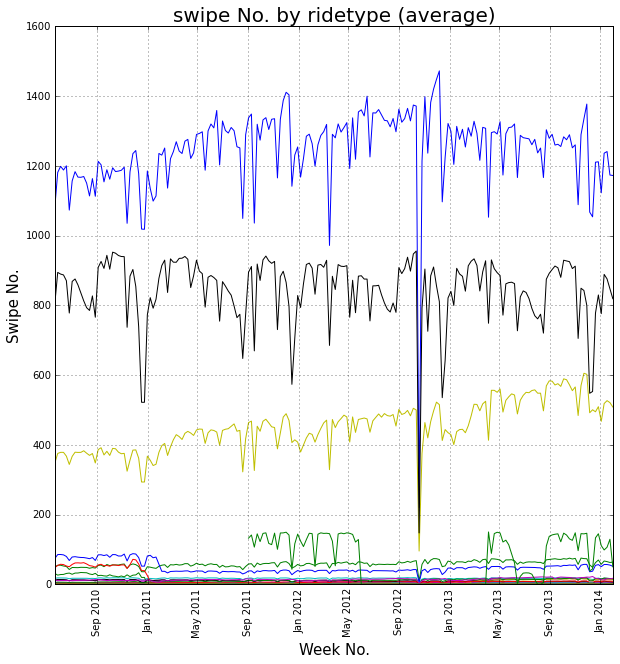

In [70]:
fig1 = plt.figure(figsize=(10,10))
fig1.add_subplot(111)
plt.plot(ridetype.index, ridetype)
plt.title('swipe No. by ridetype (average)', fontsize=20)
plt.xticks(rotation=90)
plt.xlabel('Week No.', fontsize=15)
plt.ylabel('Swipe No.', fontsize=15)
plt.grid()
plt.show

## By simply looking at the plots (both by station and by ridetype), we can detect a huge drop in the winter of 2012. I'll detect the event as an outlier using 3 standard deviations from mean as the critical value. And I'll only apply it to the swipe numbers by ridetype (average). The same code can be applied to other datasets.

In [15]:
ridetype_num = pd.DataFrame(by_ridetype_avg.T).convert_objects(convert_numeric=True)

/Users/eliseowang/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [37]:
ridetype_num.loc['sigma'] = ridetype_num.std()
ridetype_num.loc['mean'] = ridetype_num.mean()
ridetype_num.loc['critical min'] = ridetype_num.mean() - 3.1*ridetype_num.std()
ridetype_num.loc['critical max'] = ridetype_num.mean() + 3.1*ridetype_num.std()

In [38]:
# calculate if any value in the dataframe is an outliers
eventsmin = np.where(ridetype_num < ridetype_num.loc['critical min'])[0]
eventsmax = np.where(ridetype_num > ridetype_num.loc['critical max'])[0]

In [39]:
events = np.array(eventsmin)
np.unique(events)

array([126, 173, 189, 194])

## According to the calculation, week 126, 173 189 and 194 have outliers. As we have seen previously in the plots, in week 126 the plot shows a sharp drop. Week 173, 189 and 194 are not very obvious on the plots though. As for week 126, the sharp drop was probably caused by Hurricane Sandy when the infrustructure was damaged and the use of metro dropped significantly.

## Task 2